# Tennis match prediction and playing strategy -- Exploratory Data Analysis

## Goal
1. Load data from output of data cleaning notebook
2. Ask and answer questions
3. Make conclusions from the observation

### Importing useful packages

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# set the dataframe displaying format
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

# supress warnings
import warnings
warnings.filterwarnings("ignore")

sns.set()
sns.set_style("whitegrid")

### Load data
We will load the processed `scores_raw.csv` data from data cleaning step with players' ranking data included as well as all the stats, tournament and rank data

In [3]:
scores = pd.read_csv('../Data/scores_raw_processed.csv')
stats = pd.read_csv('../Data/stats_raw_processed.csv')
tournament = pd.read_csv('../Data/tournament.csv')
rank = pd.read_csv('../Data/ranking.csv')

In [4]:
# check all the data size
print(scores.shape)
print(stats.shape)
print(tournament.shape)
print(rank.shape)

(69168, 22)
(69164, 51)
(4114, 28)
(2694539, 14)


In [5]:
# display the examples of all data
print('scores')
display(scores.head())
print('stats')
display(stats.head())
print('tournament')
display(tournament.head())
print('rank')
display(rank.head())

scores


,match_id,index,tourney_year_id,tourney_order,tourney_round_name,round_order,match_order,winner_name,winner_player_id,loser_name,loser_player_id,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,winner_ranking,loser_ranking,winner_ranking_points,loser_ranking_points
0,1994-224-g252-a028,13062,1994-224,65,Round of 16,4,8,Marc-Kevin Goellner,g252,Alex Antonitsch,a028,76(4) 76(5),2,0,14,12,2,0,82.0,147.0,0.0,0.0
1,2011-520-v306-ma21,71275,2011-520,32,Round of 128,7,16,Fernando Verdasco,v306,Juan Monaco,ma21,62 75 46 64,3,1,23,17,0,0,20.0,43.0,1515.0,1025.0
2,2013-352-h756-i165,82579,2013-352,64,Round of 64,6,8,Robin Haase,h756,Denis Istomin,i165,76(8) 63,2,0,13,9,1,0,49.0,45.0,927.0,965.0
3,1991-311-m338-g108,1579,1991-311,38,Round of 32,5,13,Shuzo Matsuoka,m338,Rodolphe Gilbert,g108,63 62,2,0,12,5,0,0,92.0,105.0,0.0,0.0
4,2013-560-f401-t742,81697,2013-560,51,Round of 16,4,4,David Ferrer,f401,Janko Tipsarevic,t742,76(2) 36 75 76(3),3,1,24,23,2,0,4.0,21.0,7210.0,1685.0


stats


,match_id,tourney_order,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,winner_first_serve_points_total,winner_second_serve_points_won,winner_second_serve_points_total,winner_break_points_saved,winner_break_points_serve_total,winner_service_points_won,winner_service_points_total,winner_first_serve_return_won,winner_first_serve_return_total,winner_second_serve_return_won,winner_second_serve_return_total,winner_break_points_converted,winner_break_points_return_total,winner_service_games_played,winner_return_games_played,winner_return_points_won,winner_return_points_total,winner_total_points_won,winner_total_points_total,loser_aces,loser_double_faults,loser_first_serves_in,loser_first_serves_total,loser_first_serve_points_won,loser_first_serve_points_total,loser_second_serve_points_won,loser_second_serve_points_total,loser_break_points_saved,loser_break_points_serve_total,loser_service_points_won,loser_service_points_total,loser_first_serve_return_won,loser_first_serve_return_total,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total
0,1994-224-g252-a028,63,105.0,18.0,3.0,40.0,76.0,34.0,40.0,25.0,36.0,0.0,0.0,59.0,76.0,15.0,59.0,18.0,40.0,0.0,0.0,12.0,12.0,33.0,99.0,92.0,175.0,8.0,3.0,59.0,99.0,44.0,59.0,22.0,40.0,0.0,0.0,66.0,99.0,6.0,40.0,11.0,36.0,0.0,0.0,12.0,12.0,17.0,76.0,83.0,175.0
1,2011-520-v306-ma21,30,207.0,7.0,9.0,86.0,140.0,65.0,86.0,24.0,54.0,8.0,11.0,89.0,140.0,34.0,75.0,20.0,51.0,6.0,12.0,20.0,20.0,54.0,126.0,143.0,266.0,0.0,2.0,75.0,126.0,41.0,75.0,31.0,51.0,6.0,12.0,72.0,126.0,21.0,86.0,30.0,54.0,3.0,11.0,20.0,20.0,51.0,140.0,123.0,266.0
2,2013-352-h756-i165,62,84.0,10.0,4.0,42.0,76.0,37.0,42.0,15.0,34.0,2.0,3.0,52.0,76.0,13.0,45.0,11.0,20.0,2.0,6.0,11.0,10.0,24.0,65.0,76.0,141.0,6.0,1.0,45.0,65.0,32.0,45.0,9.0,20.0,4.0,6.0,41.0,65.0,5.0,42.0,19.0,34.0,1.0,3.0,10.0,11.0,24.0,76.0,65.0,141.0
3,1991-311-m338-g108,36,61.0,7.0,2.0,39.0,59.0,33.0,39.0,9.0,20.0,0.0,0.0,42.0,59.0,8.0,18.0,9.0,21.0,3.0,3.0,9.0,8.0,17.0,39.0,59.0,98.0,2.0,4.0,18.0,39.0,10.0,18.0,12.0,21.0,0.0,3.0,22.0,39.0,6.0,39.0,11.0,20.0,0.0,0.0,8.0,9.0,17.0,59.0,39.0,98.0
4,2013-560-f401-t742,49,237.0,13.0,4.0,93.0,142.0,68.0,93.0,23.0,49.0,9.0,15.0,91.0,142.0,35.0,103.0,38.0,72.0,4.0,15.0,22.0,23.0,73.0,175.0,164.0,317.0,8.0,5.0,103.0,175.0,68.0,103.0,34.0,72.0,11.0,15.0,102.0,175.0,25.0,93.0,26.0,49.0,6.0,15.0,23.0,22.0,51.0,142.0,153.0,317.0


tournament


,tourney_year,tourney_order,tourney_name,tourney_id,tourney_slug,tourney_location,tourney_dates,tourney_month,tourney_day,tourney_singles_draw,tourney_doubles_draw,tourney_conditions,tourney_surface,tourney_fin_commit,tourney_url_suffix,singles_winner_name,singles_winner_url,singles_winner_player_slug,singles_winner_player_id,doubles_winner_1_name,doubles_winner_1_url,doubles_winner_1_player_slug,doubles_winner_1_player_id,doubles_winner_2_name,doubles_winner_2_url,doubles_winner_2_player_slug,doubles_winner_2_player_id,tourney_year_id
0,1877,1,Wimbledon,540.0,wimbledon,"London, Great Britain",1877.07.09,7.0,9.0,32,32,Outdoor,Grass,NaN,/en/scores/archive/wimbledon/540/1877/results,Spencer Gore,/en/players/spencer-gore/gi91/overview,spencer-gore,gi91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1877-540
1,1878,1,Wimbledon,540.0,wimbledon,"London, Great Britain",1878.07.08,7.0,8.0,64,64,Outdoor,Grass,NaN,/en/scores/archive/wimbledon/540/1878/results,Frank Hadow,/en/players/frank-hadow/hg50/overview,frank-hadow,hg50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1878-540
2,1879,1,Wimbledon,540.0,wimbledon,"London, Great Britain",1879.07.07,7.0,7.0,64,64,Outdoor,Grass,NaN,/en/scores/archive/wimbledon/540/1879/results,John Hartley,/en/players/john-hartley/hg35/overview,john-hartley,hg35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1879-540
3,1880,1,Wimbledon,540.0,wimbledon,"London, Great Britain",1880.07.05,7.0,5.0,64,64,Outdoor,Grass,NaN,/en/scores/archive/wimbledon/540/1880/results,John Hartley,/en/players/john-hartley/hg35/overview,john-hartley,hg35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1880-540
4,1881,1,Wimbledon,540.0,wimbledon,"London, Great Britain",1881.07.02,7.0,2.0,64,64,Outdoor,Grass,NaN,/en/scores/archive/wimbledon/540/1881/results,William Renshaw,/en/players/william-renshaw/rg71/overview,william-renshaw,rg71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1881-540


rank


,week_title,week_year,week_month,week_day,rank_text,rank_number,move_positions,move_direction,player_age,ranking_points,tourneys_played,player_url,player_slug,player_id
0,2017.11.20,2017,11,20,1,1,NaN,NaN,31.0,10645,18,/en/players/rafael-nadal/n409/overview,rafael-nadal,n409
1,2017.11.20,2017,11,20,2,2,NaN,NaN,36.0,9605,17,/en/players/roger-federer/f324/overview,roger-federer,f324
2,2017.11.20,2017,11,20,3,3,3.0,up,26.0,5150,23,/en/players/grigor-dimitrov/d875/overview,grigor-dimitrov,d875
3,2017.11.20,2017,11,20,4,4,1.0,down,20.0,4610,25,/en/players/alexander-zverev/z355/overview,alexander-zverev,z355
4,2017.11.20,2017,11,20,5,5,1.0,down,24.0,4015,27,/en/players/dominic-thiem/tb69/overview,dominic-thiem,tb69


Before doing analysis of the data, we will combine the dataset to help us relate the tables together and find out the relationship between variables, we do so by using `pd.merge` and set up a key to join two tables, we will merge `scores`, `stats` and `tournament` all together in a single dataframe, we will leave out the `rank` dataframe alone and reference to it if necessary.

In [6]:
data_all = pd.merge(scores, stats, how='inner', on=['match_id'])
data_all = pd.merge(data_all, tournament, how='inner', on=['tourney_year_id'])
data_all.shape

(69182, 99)

In [7]:
# check the missing values in each column
data_all.isnull().sum()

match_id                               0
index                                  0
tourney_year_id                        0
tourney_order_x                        0
tourney_round_name                     0
round_order                            0
match_order                            0
winner_name                            0
winner_player_id                       0
loser_name                             0
loser_player_id                        0
match_score_tiebreaks                  0
winner_sets_won                        0
loser_sets_won                         0
winner_games_won                       0
loser_games_won                        0
winner_tiebreaks_won                   0
loser_tiebreaks_won                    0
winner_ranking                      1729
loser_ranking                       1812
winner_ranking_points               1729
loser_ranking_points                1812
tourney_order_y                        0
match_duration                         0
winner_aces     

In [8]:
data_all.dropna(inplace=True)

Since we are only interested in singles, we will drop all the double related columns.

In [9]:
drop_col = [col for col in data_all.columns if 'doubles' in col]
data_all.drop(drop_col, axis=1, inplace=True)
data_all_raw = data_all.copy()
data_after_2009 = data_all[data_all['index'] > 60167].copy()

In [10]:
# check the result
data_all.head()

,match_id,index,tourney_year_id,tourney_order_x,tourney_round_name,round_order,match_order,winner_name,winner_player_id,loser_name,loser_player_id,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,winner_ranking,loser_ranking,winner_ranking_points,loser_ranking_points,tourney_order_y,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,winner_first_serve_points_total,winner_second_serve_points_won,winner_second_serve_points_total,winner_break_points_saved,winner_break_points_serve_total,winner_service_points_won,winner_service_points_total,winner_first_serve_return_won,winner_first_serve_return_total,winner_second_serve_return_won,winner_second_serve_return_total,winner_break_points_converted,winner_break_points_return_total,winner_service_games_played,winner_return_games_played,winner_return_points_won,winner_return_points_total,winner_total_points_won,winner_total_points_total,loser_aces,loser_double_faults,loser_first_serves_in,loser_first_serves_total,loser_first_serve_points_won,loser_first_serve_points_total,loser_second_serve_points_won,loser_second_serve_points_total,loser_break_points_saved,loser_break_points_serve_total,loser_service_points_won,loser_service_points_total,loser_first_serve_return_won,loser_first_serve_return_total,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total,tourney_year,tourney_order,tourney_name,tourney_id,tourney_slug,tourney_location,tourney_dates,tourney_month,tourney_day,tourney_singles_draw,tourney_conditions,tourney_surface,tourney_fin_commit,tourney_url_suffix,singles_winner_name,singles_winner_url,singles_winner_player_slug,singles_winner_player_id
0,1994-224-g252-a028,13062,1994-224,65,Round of 16,4,8,Marc-Kevin Goellner,g252,Alex Antonitsch,a028,76(4) 76(5),2,0,14,12,2,0,82.0,147.0,0.0,0.0,63,105.0,18.0,3.0,40.0,76.0,34.0,40.0,25.0,36.0,0.0,0.0,59.0,76.0,15.0,59.0,18.0,40.0,0.0,0.0,12.0,12.0,33.0,99.0,92.0,175.0,8.0,3.0,59.0,99.0,44.0,59.0,22.0,40.0,0.0,0.0,66.0,99.0,6.0,40.0,11.0,36.0,0.0,0.0,12.0,12.0,17.0,76.0,83.0,175.0,1994,65,Schenectady,224.0,schenectady,Schenectady,1994.08.22,8.0,22.0,32,Outdoor,Hard,"$313,750",/en/scores/archive/schenectady/224/1994/results,Jacco Eltingh,/en/players/jacco-eltingh/e106/overview,jacco-eltingh,e106
1,1994-224-e113-b401,13059,1994-224,65,Round of 16,4,5,Thomas Enqvist,e113,Steve Bryan,b401,60 63,2,0,12,3,0,0,33.0,123.0,0.0,0.0,63,55.0,7.0,3.0,22.0,46.0,20.0,22.0,11.0,24.0,1.0,2.0,31.0,46.0,15.0,31.0,14.0,18.0,5.0,11.0,8.0,7.0,29.0,49.0,60.0,95.0,0.0,2.0,31.0,49.0,16.0,31.0,4.0,18.0,6.0,11.0,20.0,49.0,2.0,22.0,13.0,24.0,1.0,2.0,7.0,8.0,15.0,46.0,35.0,95.0,1994,65,Schenectady,224.0,schenectady,Schenectady,1994.08.22,8.0,22.0,32,Outdoor,Hard,"$313,750",/en/scores/archive/schenectady/224/1994/results,Jacco Eltingh,/en/players/jacco-eltingh/e106/overview,jacco-eltingh,e106
2,1994-224-a176-c179,13056,1994-224,65,Round of 16,4,2,Jan Apell,a176,Carlos Costa,c179,61 64,2,0,12,5,0,0,91.0,19.0,0.0,0.0,63,61.0,4.0,3.0,30.0,54.0,26.0,30.0,11.0,24.0,4.0,5.0,37.0,54.0,13.0,31.0,14.0,24.0,4.0,6.0,9.0,8.0,27.0,55.0,64.0,109.0,6.0,4.0,31.0,55.0,18.0,31.0,10.0,24.0,2.0,6.0,28.0,55.0,4.0,30.0,13.0,24.0,1.0,5.0,8.0,9.0,17.0,54.0,45.0,109.0,1994,65,Schenectady,224.0,schenectady,Schenectady,1994.08.22,8.0,22.0,32,Outdoor,Hard,"$313,750",/en/scores/archive/schenectady/224/1994/results,Jacco Eltingh,/en/players/jacco-eltingh/e106/overview,jacco-eltingh,e106
3,1994-224-e113-l009,13068,1994-224,65,Round of 32,5,6,Thomas Enqvist,e113,Leonardo Lavalle,l009,75 76(5),2,0,14,11,1,0,33.0,292.0,0.0,0.0,63,89.0,5.0,7.0,37.0,67.0,31.0,37.0,12.0,30.0,1.0,4.0,43.0,67.0,18.0,49.0,17.0,30.0,4.0,7.0,12.0,12.0,35.0,79.0

### Univariate Analysis
Most of the variables in `data_all` are statistics of a certain match, it would not be too helpful for our future modeling to analyze the stat one by one on its own, it should be more helpful to find out the relationship between stats and the match outcome, since this is what we have more interests in. In this part, we will focus on the match and tournament scale to get to know more about our data instead of using individual stat.

#### Question 1: What are the match duration distribution of  every single match in this dataset? Is it close to normal?

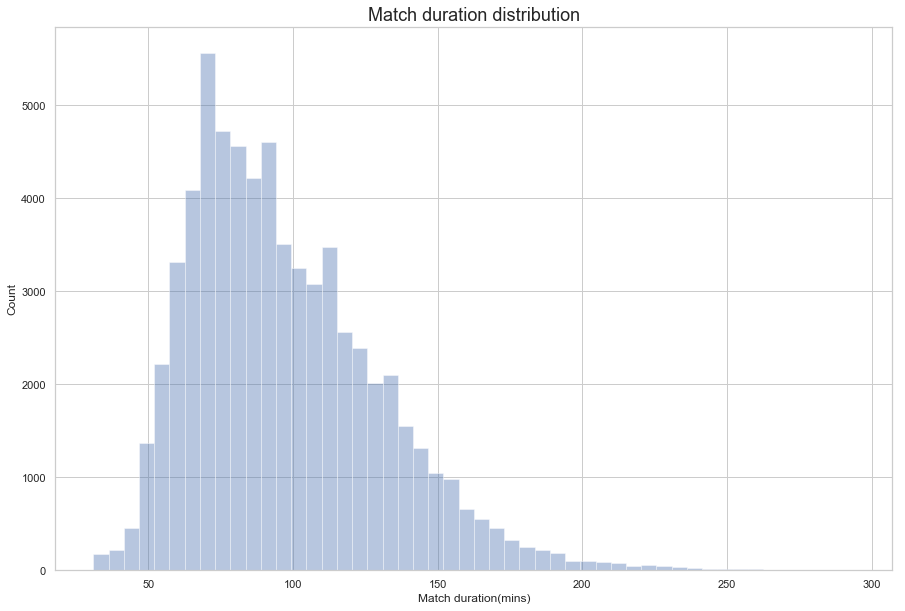

In [11]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.distplot(data_all['match_duration'], kde=False)
ax.set_title('Match duration distribution', size=18)
ax.set_ylabel('Count')
ax.set_xlabel('Match duration(mins)')
plt.show()

#### Answer: <br/><br/>From the graph above, we can see that the distribution of match duration is right skewed instead of normal, from the previous data cleaning/wrangling notebook, we have eliminated matches that are extremely long or unreasonbly short, in reality, it takes at least some time to finish one match, since the usual ATP matches requires at least two sets of win and the players level difference is not that much like an amateur vs pro, because a player needs to have a certain ranking to qualify for the main draw, even the qualify draw are composed of all pros, so it is unlikely to see 6:0 6:0 match, thus the lower bound of the match duration is not something close to 0(we have eliminated player retire cases already), on the other hand, the upper bound is theoretically unlimited, or at least has much more possible values, since players that have similar level could take a long time to finish the match.

#### Question 2: What are the magnitude of all the matches in the dataset? 

We will plot a bar chart for `tourney_singles_draw`.

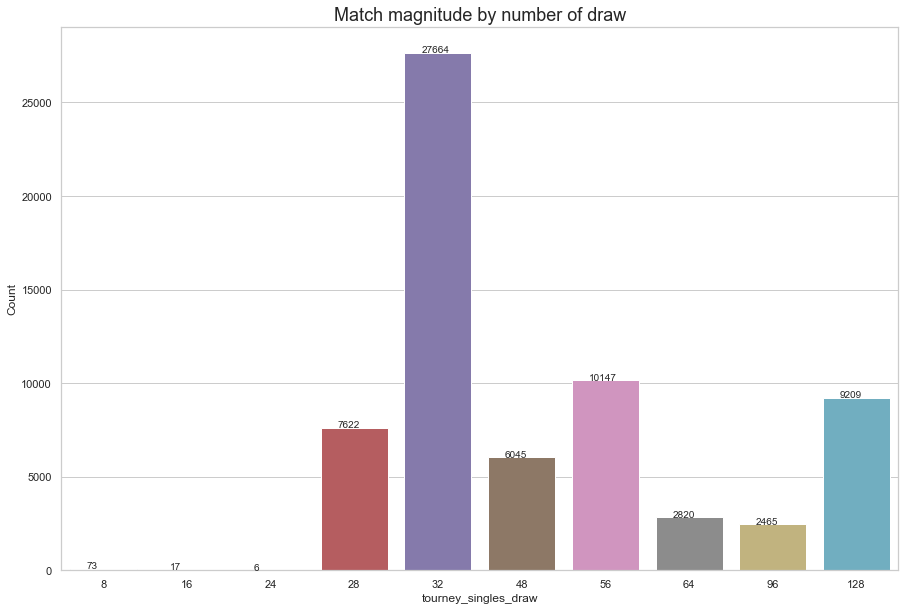

In [12]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.countplot(x='tourney_singles_draw', data=data_all)
ax.set_title('Match magnitude by number of draw', size=18)
ax.set_ylabel('Count')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), xy=(p.get_x()+0.2, p.get_height()))
plt.show()

#### Answer: <br/><br/>We can see from the graph that most of the tournaments are 32 draws, which requires player to win 5 matches in a row in the main draw, if we take a look of the [ATP tournament](https://www.atptour.com/en/tournaments), most of the ATP tournaments are either [ATP250](https://en.wikipedia.org/wiki/ATP_Tour_250) or [ATP500](https://en.wikipedia.org/wiki/ATP_Tour_500), which has majority 32 draws, only [Grand Slam](https://en.wikipedia.org/wiki/Grand_Slam_(tennis)) tournaments have 128 draws, we can also see there are 8 draws as well, which is the [ATP Finals](https://en.wikipedia.org/wiki/ATP_Finals), only the 8 best players of that year are able to participate in the event. There are also 16, 24 draws, this could be some tournament that no longer exist, [ATP Masters 1000](https://en.wikipedia.org/wiki/ATP_Tour_Masters_1000) have multiple number of draws depends on the tournament, like 56, 64, or 96. This could be an important feature for us in modeling step since it is a measurement of difficulty of a specific tournament.

### Bivariate Analysis
In this section we will dig out some important features that are more relevant to determine the outcome of matches. We will try to figure out the relationship between variables and see if we could find some trend.

#### Question 3: Does ranking reflects the recent performance of the player? How much?

Tennis has a ranking system that is based on the previous 12 month performance, tournaments are all point based and each round of the draw gives the player different points as well, the amount of points gained also depends on the magnitude of the tournament, for example, [Grand Slam](https://en.wikipedia.org/wiki/Grand_Slam_(tennis)) gives 2000 points for the champion. However, tennis has a single elimination draw, which means once lose, the player is out from the match, the champion is the only player that has not lose any single match in the main draw. Top players may fall in previous rounds, we will explore how relevant the ranking is to the match outcome. We might have expected the higher ranking player wins the match most of the time, by taking the average of the ranking, the `winner_ranking` should be lower(the lower the number, the higher the rank) than the `loser_ranking` on average.

In [13]:
mean_ranking = scores[['winner_ranking', 'loser_ranking']].mean()

In [14]:
mean_ranking.iloc[0]

69.26624060261867

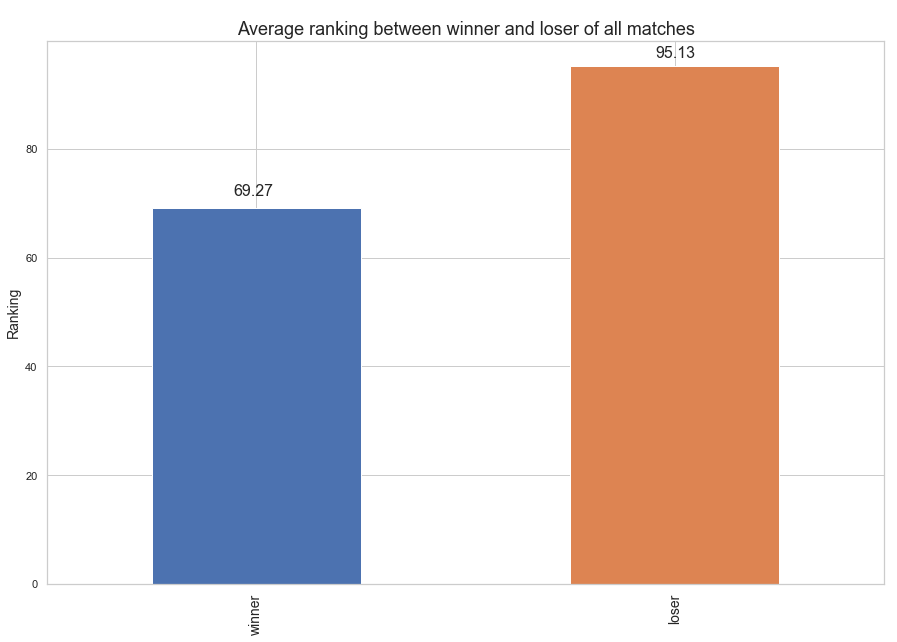

In [15]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
# drop missing values 
scores.dropna(inplace=True)
ax = scores[['winner_ranking', 'loser_ranking']].mean().plot(kind='bar')
ax.set_title('Average ranking between winner and loser of all matches', size=18)
ax.set_xticklabels(['winner', 'loser'], fontsize=14)
ax.set_ylabel('Ranking', fontsize=14)
ax.annotate(np.round(mean_ranking.iloc[0],2), xy=(0.26,0.695), xycoords='figure fraction', fontsize=16)
ax.annotate(np.round(mean_ranking.iloc[1],2), xy=(0.73,0.91), xycoords='figure fraction', fontsize=16)
plt.show()

From the plot above, we can see that the average ranking of winner is indeed lower than the average ranking of loser by the difference of around 25, however, is it statistically significant? We will use hypothesis test to find out.

#### Hypothesis:
H<sub>0</sub>: Winner<sub>ranking</sub> = Loser<sub>ranking</sub> <br/>
H<sub>a</sub>: Winner<sub>ranking</sub> $\neq$ Loser<sub>ranking</sub> 


In [16]:
from scipy.stats import ttest_ind

t, p_val = ttest_ind(scores['winner_ranking'], scores['loser_ranking'], equal_var=False)
print('t statistics: {}'.format(t))
print('p value: {}'.format(p_val))

t statistics: -49.982506884166284
p value: 0.0


We can see the p-value is literally zero, which suggests that the ranking of winner and loser of has a significant mean difference at all matches, this is to be confirmed that using rank as an indicator in general to predict the outcome of the match would be better than random guessing.

#### Question 4: Follow by question 3, what are the chances of underdog to win the match of all tournament? What if we break into different surface? Different month?
We will use `winner_ranking` and `loser_ranking` to determine if the underdog won the match, we basically use a boolean mask to see if `winner_ranking` is greater than `loser_ranking`.

##### All matches

In [17]:
# add another column to indicate whether under dog wins or not
data_all['underdog_win'] = (data_all['winner_ranking'] > data_all['loser_ranking'])

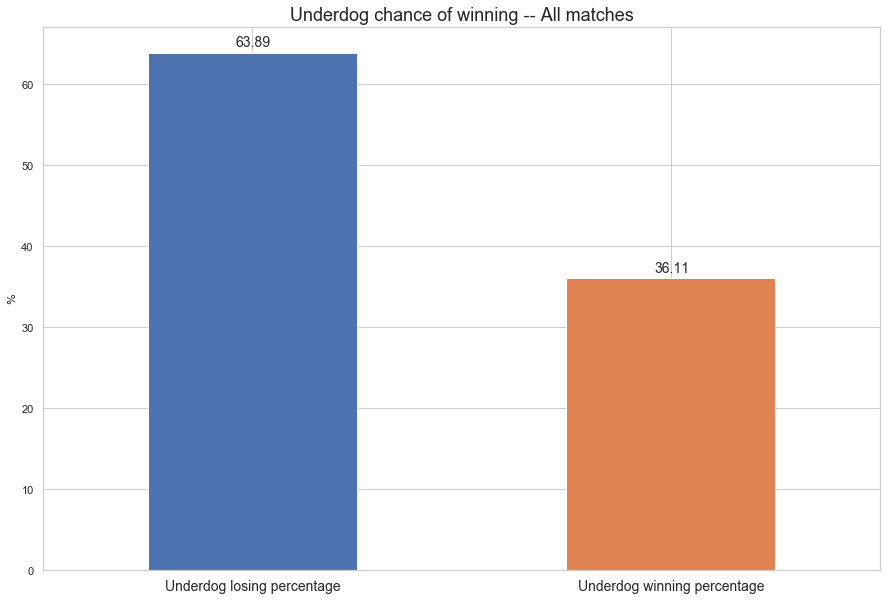

In [18]:
fig, ax = plt.subplots(1,1,figsize=(15, 10))
ax = (data_all['underdog_win'].value_counts(normalize=True)*100).plot(kind='bar')
ax.set_xticklabels(['Underdog losing percentage', 'Underdog winning percentage'], rotation=0, size=14)
ax.set_title('Underdog chance of winning -- All matches', size=18)
ax.set_ylabel('%')
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), xy=(p.get_x()+0.21, p.get_height()+0.7), size=14)
plt.show()

##### By surface

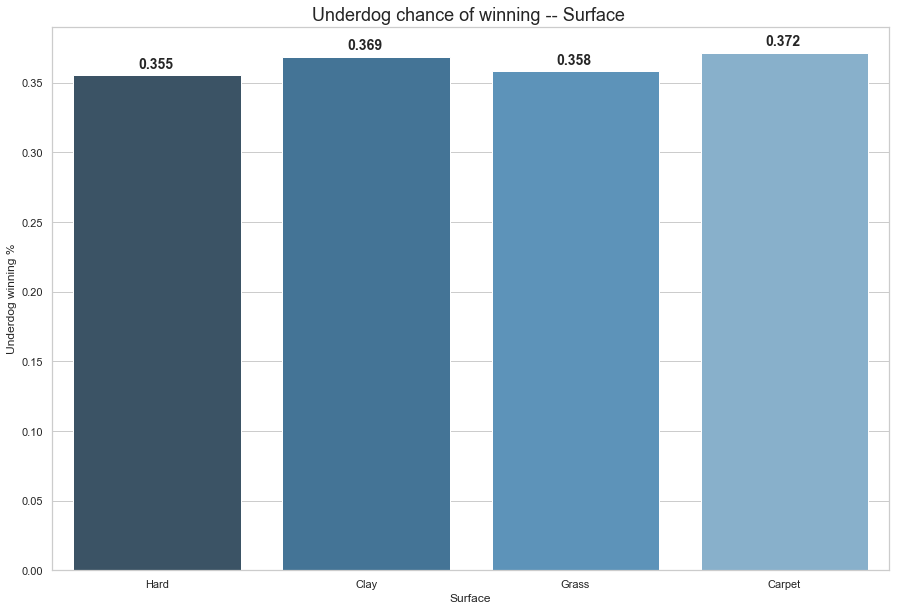

In [19]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.barplot(x='tourney_surface', y='underdog_win', data=data_all, \
                 palette="Blues_d", ci=None)
ax.set_title('Underdog chance of winning -- Surface ', size=18)
ax.set_ylabel('Underdog winning %')
ax.set_xlabel('Surface')
for p in ax.patches:
    
    ax.annotate('{:.3f}'.format(p.get_height()), \
                xy=(p.get_x()+0.31, p.get_height()+0.005), size=14, weight='semibold')
plt.show() 

##### By month

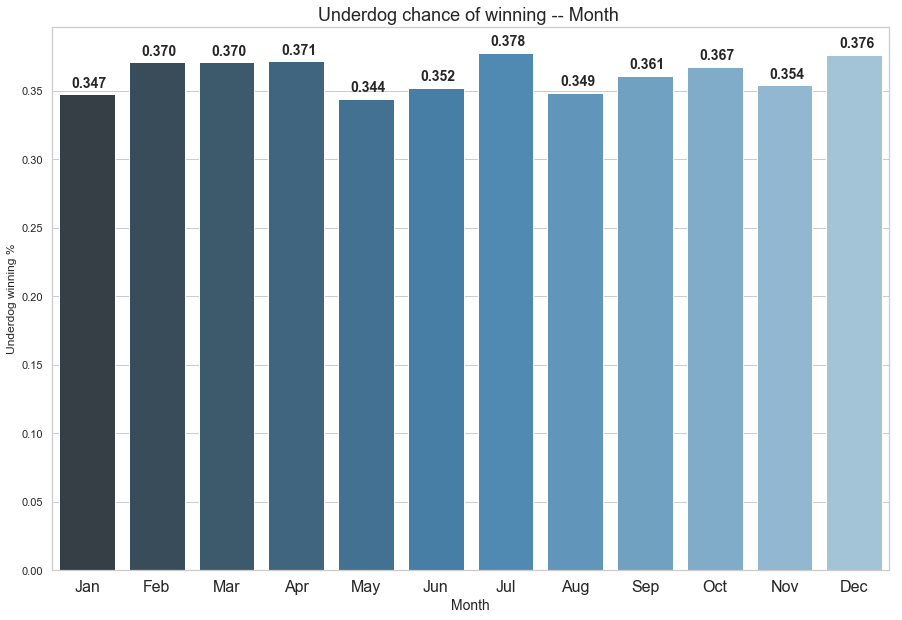

In [20]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.barplot(x='tourney_month', y='underdog_win', data=data_all, \
                 palette="Blues_d", ci=None)
ax.set_title('Underdog chance of winning -- Month ', size=18)
ax.set_ylabel('Underdog winning %')
ax.set_xlabel('Month', size=14)
for p in ax.patches:
    
    ax.annotate('{:.3f}'.format(p.get_height()), \
                xy=(p.get_x()+0.18, p.get_height()+0.005), size=14, weight='semibold')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], size=16)
plt.show() 

##### By tournament magnitude

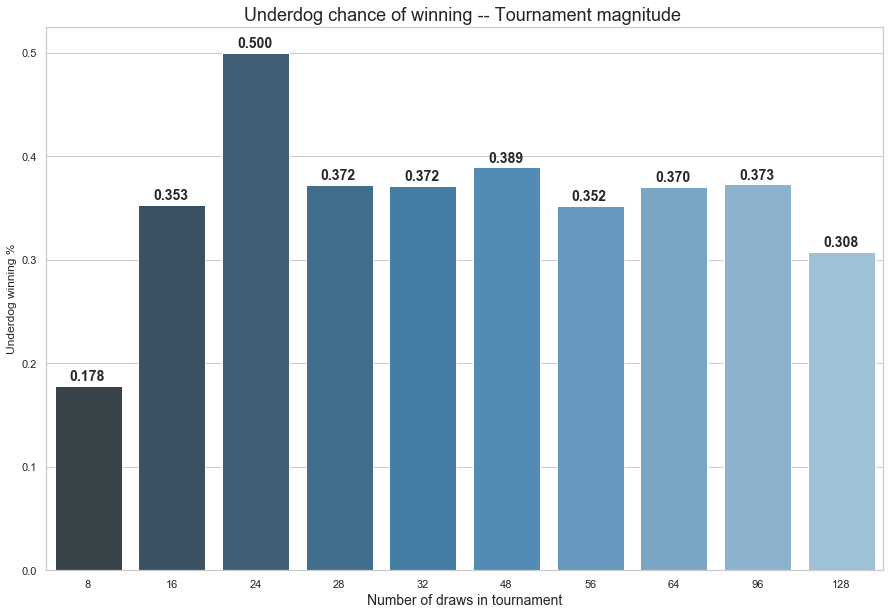

In [21]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.barplot(x='tourney_singles_draw', y='underdog_win', data=data_all, \
                 palette="Blues_d", ci=None)
ax.set_title('Underdog chance of winning -- Tournament magnitude ', size=18)
ax.set_ylabel('Underdog winning %')
ax.set_xlabel('Number of draws in tournament', size=14)
for p in ax.patches:
    
    ax.annotate('{:.3f}'.format(p.get_height()), \
                xy=(p.get_x()+0.18, p.get_height()+0.005), size=14, weight='semibold')

plt.show() 

#### Answer: <br/><br/>We have separated the plots based on the conditions, we can see that in overall, underdog only has around 36.11% of winning percentage, if we further break it down into different surface, the hard court has less chance of winning percentage for underdog (35.5%) vs carpet(37.2%). When breaking into different months, we were expecting the top rank players may be more tired toward the end of the season and might have more chances to get knock out by the underdogs, however, the trend was not that obvious, we can see that the highest underdog winning percentage happens in July, come down in August and gradually goes up again toward the end. Lastly, we checked whether different tournament magnitude will make any difference, the result is kind of what we have expected, top rank players like [Big Four](https://en.wikipedia.org/wiki/Big_Four_(tennis) ) are really consistent in grand slam tournament, thus the winner percentage of underdog is only 30.8%, in ATP final, only the top 8 best players of the year can participate, the underdog winning percentage is even lower, this suggested it is even harder to beat the top four players for underdogs. We will do another follow up hypothesis next to see whether the difference is statistically difference. 

#### Question 5: Follow by question 4, are the difference between underdog winning percentage under different conditions statistically significant?

We will apply [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance) to analyze whether there exists at least one pair of population that are significant different from each other in the group, the hypothesis is the following:

##### Hypothesis<br/>
**H<sub>0</sub>** :  Underdog<sub>carpet</sub> = Underdog<sub>clay</sub> = Underdog<sub>hard</sub> = Underdog<sub>grass</sub><br/>
**H<sub>a</sub>** :  at least one pair is significant different from each other

In [22]:
# import package
from scipy.stats import f_oneway
carpet = data_all[data_all['tourney_surface'] == 'Carpet']['underdog_win']
clay = data_all[data_all['tourney_surface'] == 'Clay']['underdog_win']
grass = data_all[data_all['tourney_surface'] == 'Grass']['underdog_win']
hard = data_all[data_all['tourney_surface'] == 'Hard']['underdog_win']

f_score, p_val = f_oneway(carpet, clay, grass, hard)
print(f'f score:{f_score}')
print(f'p value:{p_val}')

f score:4.172215733627002
p value:0.005810456093153208


We can see that p value is quite small, suggesting there exists at least one pair of data means that are significant different from each other, we will double confirm it by using a t-test. We will pick `hard` vs `carpet` and `hard` vs `clay` since they appeared to have larger mean difference as we shown in question 4.

##### Hypothesis<br/>
1. 
**H<sub>0</sub>** :  Underdog<sub>hard</sub> = Underdog<sub>carpet</sub><br/>
**H<sub>a</sub>** :  Underdog<sub>hard</sub> $\neq$ Underdog<sub>carpet</sub><br/>
2. 
**H<sub>0</sub>** :  Underdog<sub>hard</sub> = Underdog<sub>clay</sub><br/>
**H<sub>a</sub>** :  Underdog<sub>hard</sub> $\neq$ Underdog<sub>clay</sub><br/>

In [23]:
# import package
from scipy.stats import ttest_ind

# hard vs carpet
t_stat, p_val = ttest_ind(hard, carpet, equal_var=False)
print('Hard vs Carpet')
print('-'*50)
print(f't staat:{t_stat}')
print(f'p value:{p_val}')
print('\n')
# hard vs clay
t_stat, p_val = ttest_ind(hard, clay, equal_var=False)
print('Hard vs Clay')
print('-'*50)
print(f't stat:{t_stat}')
print(f'p value:{p_val}')

Hard vs Carpet
--------------------------------------------------
t staat:-1.9813567993086958
p value:0.047609799901674535


Hard vs Clay
--------------------------------------------------
t stat:-3.219867910000185
p value:0.0012833540445372526


Next, we will apply the same idea on underdog winning percentage separated by month.

##### Hypothesis<br/>
**H<sub>0</sub>** :  Underdog<sub>Jan</sub> = Underdog<sub>Feb</sub> = Underdog<sub>Mar</sub> = Underdog<sub>Apr</sub> = Underdog<sub>May</sub> = Underdog<sub>Jun</sub> = Underdog<sub>Jul</sub> = Underdog<sub>Aug</sub> = Underdog<sub>Sep</sub> = Underdog<sub>Oct</sub> = Underdog<sub>Nov</sub> = Underdog<sub>Dec</sub><br/>
**H<sub>a</sub>** :  at least one pair is significant different from each other

In [24]:
months = {}
for month in range(1,13):
    months[month] = data_all[data_all['tourney_month'] == month]['underdog_win']

f_score, p_val = f_oneway(months[1], months[2], months[3], months[4],
                          months[5], months[6], months[7], months[8],
                          months[9], months[10], months[11], months[12],)
print(f'f score:{f_score}')
print(f'p value:{p_val}')

f score:3.622272977322145
p value:3.8165018792720186e-05


Again, we can see that p value is relatively small, thus we can conclude that there exists at least one pair of data means that are significant different from each other, we will pick `Jul` vs `May` and `Jul` vs `Jan` for t-test.

##### Hypothesis<br/>
1. 
**H<sub>0</sub>** :  Underdog<sub>Jul</sub> = Underdog<sub>May</sub><br/>
**H<sub>a</sub>** :  Underdog<sub>Jul</sub> $\neq$ Underdog<sub>May</sub><br/>
2. 
**H<sub>0</sub>** :  Underdog<sub>Jul</sub> = Underdog<sub>Jan</sub><br/>
**H<sub>a</sub>** :  Underdog<sub>Jul</sub> $\neq$ Underdog<sub>Jan</sub><br/>

In [25]:
# Jul vs May
t_stat, p_val = ttest_ind(months[7], months[5], equal_var=False)
print('Jul vs May')
print('-'*50)
print(f't stat:{t_stat}')
print(f'p value:{p_val}')
print('\n')
# Jul vs Jan
t_stat, p_val = ttest_ind(months[7], months[1], equal_var=False)
print('Jul vs Jan')
print('-'*50)
print(f't stat:{t_stat}')
print(f'p value:{p_val}')

Jul vs May
--------------------------------------------------
t stat:4.178524162311056
p value:2.95153719098089e-05


Jul vs Jan
--------------------------------------------------
t stat:3.659919655446232
p value:0.00025328836281883715


#### Answer: <br/><br/>In this question we performed both ANOVA and t-test to find out if the graph we have plotted in question 4 is statistically significant or not, we used ANOVA first to see whether there exists at least a pair of data that has mean significant from each other, in different court surface, we found a relatively small p value, even with alpha = 0.01, we are able to reject the null hypothesis, we then picked some pairs that look to have more mean difference and perform another t-test, the p value we found in hard vs carpet is close to 5% and hard vs clay is around 0.1%, thus we concluded that the underdog winning percentage is truly different between hard court vs carpet court and hard court vs clay court, to be more precise, it is more different between hard vs clay than hard vs carpet, so it makes the underdog more difficult to beat top players on hard court than on clay court.<br/><br/> We applied the same idea on different months comparison, the results showed that it is harder for underdogs to beat top players in January and May than in July.

#### Question 6: What are the chances to beat "Tennis Big 4" in Grand Slam? In ATP Master 1000? In ATP Final?
We have mentioned about [Big Four](https://en.wikipedia.org/wiki/Big_Four_(tennis)) in previous question, those four players are [Roger Federer](https://en.wikipedia.org/wiki/Roger_Federer), [Rafael Nadal](https://en.wikipedia.org/wiki/Rafael_Nadal), [Novak Djokovic](https://en.wikipedia.org/wiki/Novak_Djokovic) and [Andy Murray](https://en.wikipedia.org/wiki/Andy_Murray), they are known for their dominance and consistency of all tennis big tournaments, we will find out how hard it is to beat the big four? We will break down into Grand Slam, ATP Master 1000, since those are largest 13 tournaments of a single season, we exclude ATP Final here since there are not many data points.

In [26]:
# assign subset of data using tourney_single_draw variable
# use tourney_single_draw to pull our grand slam and atp final data
grand_slam = data_all[data_all['tourney_singles_draw'] == 128]
atp_final = data_all[data_all['tourney_singles_draw'] == 8]

# use tourney_name to pull out atp master 1000
atp_1000 = data_all[data_all['tourney_name'].str.contains(r'1000|[mM]asters')]

In [27]:
# filter the matches that only big 4 is part of it, we have previously looked up their ids
pattern = r'f324|n409|d643|mc10'
grand_slam_big4 = grand_slam[(grand_slam['winner_player_id'].str.contains(pattern)) | \
                        (grand_slam['loser_player_id'].str.contains(pattern))]

atp_1000_big4 = atp_1000[(atp_1000['winner_player_id'].str.contains(pattern)) | \
                        (atp_1000['loser_player_id'].str.contains(pattern))]

atp_final_big4 = atp_final[(atp_final['winner_player_id'].str.contains(pattern)) | \
                        (atp_final['loser_player_id'].str.contains(pattern))]

##### Exclude Big 4 vs Big 4
Since we are more interested in how difficult for players other than Big 4 themselves to beat Big 4 in a match, we will exclude the matches that both players are big 4

In [28]:
# exclude big4 vs big4
grand_slam_big4 = grand_slam_big4[~((grand_slam_big4['winner_player_id'].str.contains(pattern)) & \
                        (grand_slam_big4['loser_player_id'].str.contains(pattern)))]

atp_1000_big4 = atp_1000_big4[~((atp_1000_big4['winner_player_id'].str.contains(pattern)) & \
                        (atp_1000_big4['loser_player_id'].str.contains(pattern)))]

atp_final_big4 = atp_final_big4[~((atp_final_big4['winner_player_id'].str.contains(pattern)) & \
                        (atp_final_big4['loser_player_id'].str.contains(pattern)))]

In [29]:
# add another columns if big 4 lost the match or not
grand_slam_big4['big4_lost'] = grand_slam_big4['loser_player_id'].str.contains(pattern)
atp_1000_big4['big4_lost'] = atp_1000_big4['loser_player_id'].str.contains(pattern)
atp_final_big4['big4_lost'] = atp_final_big4['loser_player_id'].str.contains(pattern)

##### Grand Slam

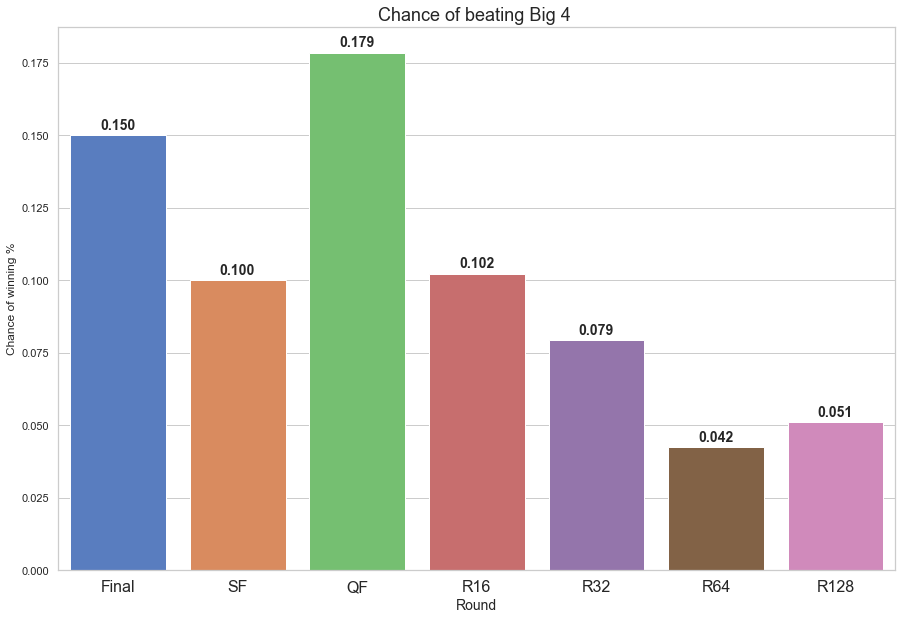

In [30]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.barplot(x='round_order', y='big4_lost', data=grand_slam_big4, \
                 palette="muted", ci=None)
ax.set_title('Chance of beating Big 4 ', size=18)
ax.set_ylabel('Chance of winning %')
ax.set_xlabel('Round', size=14)
for p in ax.patches:
    
    ax.annotate('{:.3f}'.format(p.get_height()), \
                xy=(p.get_x()+0.25, p.get_height()+0.002), size=14, weight='semibold')
ax.set_xticklabels(['Final', 'SF', 'QF', 'R16', 'R32', 'R64', 'R128'], size=16)
plt.show() 

##### ATP Masters 1000

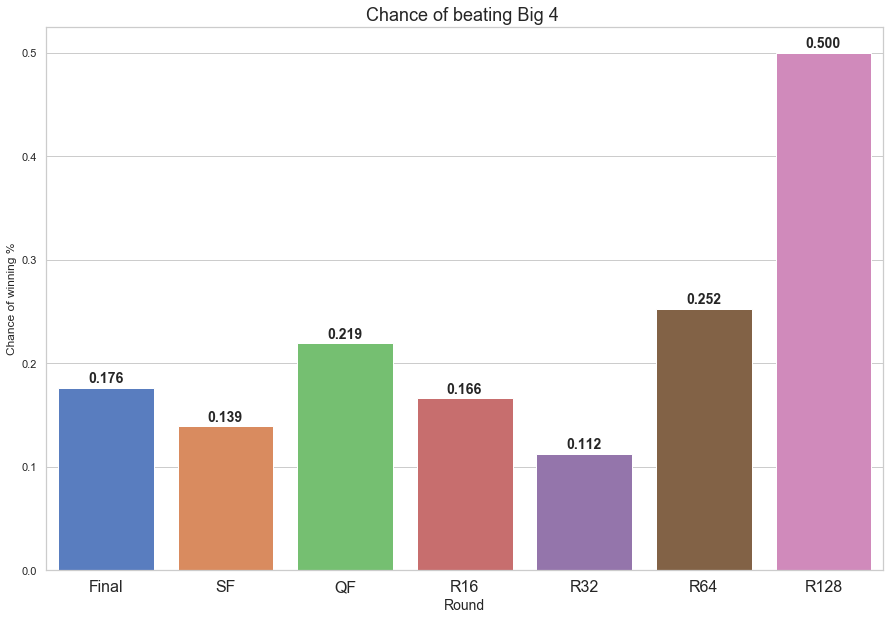

In [31]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.barplot(x='round_order', y='big4_lost', data=atp_1000_big4, \
                 palette="muted", ci=None)
ax.set_title('Chance of beating Big 4 ', size=18)
ax.set_ylabel('Chance of winning %')
ax.set_xlabel('Round', size=14)
for p in ax.patches:
    
    ax.annotate('{:.3f}'.format(p.get_height()), \
                xy=(p.get_x()+0.25, p.get_height()+0.005), size=14, weight='semibold')
ax.set_xticklabels(['Final', 'SF', 'QF', 'R16', 'R32', 'R64', 'R128'], size=16)
plt.show() 

It is interesting to see an ATP Master 1000 has round R128, we will check what those matches are.

In [32]:
atp_1000_big4[atp_1000_big4['round_order'] == 7]

,match_id,index,tourney_year_id,tourney_order_x,tourney_round_name,round_order,match_order,winner_name,winner_player_id,loser_name,loser_player_id,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,winner_ranking,loser_ranking,winner_ranking_points,loser_ranking_points,tourney_order_y,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,winner_first_serve_points_total,winner_second_serve_points_won,winner_second_serve_points_total,winner_break_points_saved,winner_break_points_serve_total,winner_service_points_won,winner_service_points_total,winner_first_serve_return_won,winner_first_serve_return_total,winner_second_serve_return_won,winner_second_serve_return_total,winner_break_points_converted,winner_break_points_return_total,winner_service_games_played,winner_return_games_played,winner_return_points_won,winner_return_points_total,winner_total_points_won,winner_total_points_total,loser_aces,loser_double_faults,loser_first_serves_in,loser_first_serves_total,loser_first_serve_points_won,loser_first_serve_points_total,loser_second_serve_points_won,loser_second_serve_points_total,loser_break_points_saved,loser_break_points_serve_total,loser_service_points_won,loser_service_points_total,loser_first_serve_return_won,loser_first_serve_return_total,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total,tourney_year,tourney_order,tourney_name,tourney_id,tourney_slug,tourney_location,tourney_dates,tourney_month,tourney_day,tourney_singles_draw,tourney_conditions,tourney_surface,tourney_fin_commit,tourney_url_suffix,singles_winner_name,singles_winner_url,singles_winner_player_slug,singles_winner_player_id,underdog_win,big4_lost
1056,2006-404-b747-d643,48885,2006-404,19,Round of 128,7,2,Julien Benneteau,b747,Novak Djokovic,d643,63 64,2,0,12,7,0,0,88.0,67.0,459.0,591.0,18,93.0,2.0,1.0,40.0,56.0,30.0,40.0,6.0,16.0,2.0,4.0,36.0,56.0,17.0,42.0,19.0,33.0,5.0,12.0,9.0,10.0,36.0,75.0,72.0,131.0,1.0,2.0,42.0,75.0,25.0,42.0,14.0,33.0,7.0,12.0,39.0,75.0,10.0,40.0,10.0,16.0,2.0,4.0,10.0,9.0,20.0,56.0,59.0,131.0,2006,19,ATP Masters Series Indian Wells,404.0,indian-wells,Indian Wells,2006.03.06,3.0,6.0,96,Outdoor,Hard,"$3,169,600",/en/scores/archive/indian-wells/404/2006/results,Roger Federer,/en/players/roger-federer/f324/overview,roger-federer,f324,True,True
18917,2004-404-n409-b484,42973,2004-404,18,Round of 128,7,23,Rafael Nadal,n409,Lars Burgsmuller,b484,62 63,2,0,12,5,0,0,36.0,76.0,953.0,481.0,17,71.0,0.0,1.0,42.0,68.0,30.0,42.0,14.0,26.0,8.0,9.0,44.0,68.0,9.0,27.0,14.0,19.0,4.0,7.0,9.0,8.0,23.0,46.0,67.0,114.0,2.0,1.0,27.0,46.0,18.0,27.0,5.0,19.0,3.0,7.0,23.0,46.0,12.0,42.0,12.0,26.0,1.0,9.0,8.0,9.0,24.0,68.0,47.0,114.0,2004,18,ATP Masters Series Indian Wells,404.0,indian-wells,Indian Wells,2004.03.08,3.0,8.0,96,Outdoor,Hard,"$2,779,000",/en/scores/archive/indian-wells/404/2004/results,Roger Federer,/en/players/roger-federer/f324/overview,roger-federer,f324,False,False
37571,2006-403-w367-mc10,49010,2006-403,20,Round of 128,7,32,Stan Wawrinka,w367,Andy Murray,mc10,75 36 64,2,1,16,15,0,0,58.0,41.0,692.0,826.0,19,127.0,1.0,8.0,65.0,105.0,41.0,65.0,16.0,40.0,5.0,11.0,57.0,105.0,25.0,49.0,17.0,42.0,6.0,13.0,16.0,15.0,42.0,91.0,99.0,196.0,5.0,2.0,49.0,91.0,24.0,49.0,25.0,42.0,7.0,13.0,49.0,91.0,24.0,65.0,24.0,40.0,6.0,11.0,15.0,16.0,48.0,105.0,97.0,196.0,2006,20,ATP Masters Series Miami,403.0,miami,Miami,2006.03.20,3.0,20.0,96,Outdoor,Hard,"$3,450,000",/en/scores/archive/miami/403/2006/results,Roger Federer,/en/players/roger-federer/f324/overview,roger-federer,f324,True,True
37580,2006-403-d643-m850,48986,2006-403,20,Round of 128,7,8,Novak Djokovic,d643,Paul-Henri Mathieu,m850,61 63,2,0,

#### Answer: <br/><br/>From those two plots above, we can easily tell the dominance of Big 4, in Grand Slam event, the highest chances of beating Big 4 is in quarter-final, but merely 17.9%, we can all see the consistency of Big 4 in first two rounds of Grand Slam event, the chances they were beaten in the first two rounds are 5.1% and 4.2%, respectively. Grand Slam event champions are the dreams of all tennis player, from this graph we know Big 4 are able to adjust themselves to the top-form competitive level and left others only little chances to beat them. In ATP Master 1000, the chances of Big 4 getting beaten are higher than in Grand Slam, interesting to see that in R128, the chance is 50%! We have pulled out those matches out of the data and we can see that some [old ATP Masters Series](https://en.wikipedia.org/wiki/ATP_Masters_Series) still have 128 draws, the matches that Big 4 lost are in relatively early stage of their careers. Excluding that, the chances of beating Big 4 in an ATP Masters 1000 event is still pretty low.

In [33]:
def previous_ten_match(match_id):
    # make a temp_df 
    temp_df = data_after_2009.copy()
    
    # find the match
    match = temp_df[temp_df['match_id'] == match_id]
    
    # find the match index
    idx = match.reset_index().loc[0, 'index']
    
    # find the winner and loser id
    winner_id = match.reset_index().loc[0, 'winner_player_id']
    loser_id = match.reset_index().loc[0, 'loser_player_id']
    
    # using winner and loser id to trace back the previous matches
    winner_prev = temp_df[((temp_df['winner_player_id'] == winner_id) \
                               | (temp_df['loser_player_id'] == winner_id)) & (temp_df['index'] < idx)]
    loser_prev = temp_df[((temp_df['winner_player_id'] == loser_id) \
                               | (temp_df['loser_player_id'] == loser_id)) & (temp_df['index'] < idx)]
    
    # check if winner_prev and loser_prev both have more than 10 matches before further process
    if len(winner_prev) >= 10  and len(loser_prev) >= 10:
        winner_prev_10 = winner_prev.sort_values(by='index').iloc[-10:]
        loser_prev_10 = loser_prev.sort_values(by='index').iloc[-10:]
        
        # create new column to store player_id
        winner_prev_10['actual_player_id'] = winner_id
        loser_prev_10['actual_player_id'] = loser_id
        
              
        
        return winner_prev_10, loser_prev_10
    else:
        return pd.DataFrame(), pd.DataFrame()
    
        

In [34]:
def clean_ten_match(df1, df2, player_1_win=1):
    # in case nothing is returned from previous function 
    if len(df1) == 0 and len(df2) == 0:
        print('no data')
        return pd.DataFrame()
    else:   
        # make a temp_df
        player_1_df = df1.copy()
        player_2_df = df2.copy()

        # extract player1 and player2 id, depends of which label we would like to prepare
        player_1_id = player_1_df.reset_index().loc[0, 'actual_player_id']
        player_2_id = player_2_df.reset_index().loc[0, 'actual_player_id']

        if player_1_win:
            player_1_df['outcome'] = 1
        else:
            player_1_df['outcome'] = 0


        # extract winner and loser stats columns
        winner_col = [i for i in player_1_df.select_dtypes(['number']).columns if 'winner' in i]
        loser_col = [i for i in player_1_df.select_dtypes(['number']).columns if 'loser' in i]

        # columns to keep in later process
        important_col = ['index', 'round_order', 'match_order', 'tourney_singles_draw', 'tourney_conditions', 'tourney_surface']



        as_winner_player_1 = player_1_df[player_1_df['winner_player_id'] == player_1_id] # include the outcome variable
        as_loser_player_1 = player_1_df[player_1_df['loser_player_id'] == player_1_id]
        
        as_winner_player_2 = player_2_df[player_2_df['winner_player_id'] == player_2_id]
        as_loser_player_2 = player_2_df[player_2_df['loser_player_id'] == player_2_id]

       

        for i in range(len(winner_col)):
            as_winner_player_1[f'player_1_relative_{winner_col[i][7:]}'] = as_winner_player_1[winner_col[i]] - \
                                                                   as_winner_player_1[loser_col[i]]
            as_winner_player_2[f'player_2_relative_{winner_col[i][7:]}'] = as_winner_player_2[winner_col[i]] - \
                                                                   as_winner_player_2[loser_col[i]]

        for i in range(len(winner_col)):
            as_loser_player_1[f'player_1_relative_{winner_col[i][7:]}'] = as_loser_player_1[loser_col[i]] - \
                                                                   as_loser_player_1[winner_col[i]]
            as_loser_player_2[f'player_2_relative_{winner_col[i][7:]}'] = as_loser_player_2[loser_col[i]] - \
                                                                   as_loser_player_2[winner_col[i]]



        # extract relative stats
        relative_col_player_1 = [i for i in as_winner_player_1.columns if 'player_1' in i]
        relative_col_player_2 = [i for i in as_winner_player_2.columns if 'player_2' in i]

        # for player 1
        final_col_as_winner_player_1 = important_col + winner_col + relative_col_player_1 + ['outcome']
        final_col_as_loser_player_1 = important_col + loser_col + relative_col_player_1 + ['outcome']
        final_df_as_winner_player_1 = as_winner_player_1[final_col_as_winner_player_1].copy()
        final_df_as_loser_player_1 = as_loser_player_1[final_col_as_loser_player_1].copy()


        # change columns name that has 'winner' to 'player_1'
        final_df_as_winner_player_1.columns = final_df_as_winner_player_1.columns.str.replace('winner', 'player_1')
        final_df_as_loser_player_1.columns = final_df_as_loser_player_1.columns.str.replace('loser', 'player_1')

        final_df_as_winner_player_1['player_1_win'] = 1
        final_df_as_loser_player_1['player_1_win'] = 0

        # combine two df
        final_df_player_1 = pd.concat([final_df_as_winner_player_1, final_df_as_loser_player_1]).sort_values(by='index')
        # rename column 
        final_df_player_1.rename(columns={'round_order': 'player_1_round_order', 'match_order': 'player_1_match_order',
                                         'tourney_singles_draw': 'player_1_tourney_singles_draw',
                                         'tourney_conditions': 'player_1_tourney_conditions',
                                         'tourney_surface': 'player_1_tourney_surface'}, inplace=True)
        final_df_player_1.drop(['index'], 1, inplace=True)
        # for player 2
        final_col_as_winner_player_2 = important_col + winner_col + relative_col_player_2 
        final_col_as_loser_player_2 = important_col + loser_col + relative_col_player_2 
        final_df_as_winner_player_2 = as_winner_player_2[final_col_as_winner_player_2].copy()
        final_df_as_loser_player_2 = as_loser_player_2[final_col_as_loser_player_2].copy()


        # change columns name that has 'winner' to 'player_2'
        final_df_as_winner_player_2.columns = final_df_as_winner_player_2.columns.str.replace('winner', 'player_2')
        final_df_as_loser_player_2.columns = final_df_as_loser_player_2.columns.str.replace('loser', 'player_2')

        final_df_as_winner_player_2['player_2_win'] = 1
        final_df_as_loser_player_2['player_2_win'] = 0

        # combine two df
        final_df_player_2 = pd.concat([final_df_as_winner_player_2, final_df_as_loser_player_2]).sort_values(by='index')
        # rename column
        final_df_player_2.rename(columns={'round_order': 'player_2_round_order', 'match_order': 'player_2_match_order',
                                         'tourney_singles_draw': 'player_2_tourney_singles_draw',
                                         'tourney_conditions': 'player_2_tourney_conditions',
                                         'tourney_surface': 'player_2_tourney_surface'}, inplace=True)
        final_df_player_2.drop(['index'], 1, inplace=True)

        # combine to final_df
        final_df = pd.concat([final_df_player_1.reset_index(drop=True), final_df_player_2.reset_index(drop=True)], axis=1)

        return final_df

        
 

In [35]:
def training_output_ML(df):
    if len(df) == 0:
        
        return pd.DataFrame()
    
    else:
        temp_df = df.copy()

        # collect the outcome
        y = temp_df.reset_index().loc[0, 'outcome']

        # drop the outome column
        temp_df.drop(['outcome'], axis=1, inplace=True)
        df_col = []

        for i in range(1,11):
            df_col += list(temp_df.columns + f'_{i}')

        temp_df_array = temp_df.values.reshape(1, temp_df.shape[0] * temp_df.shape[1])

        final_df = pd.DataFrame(temp_df_array, columns=df_col)
        final_df['outcome'] = y

        return final_df
        
   
        
        

In [39]:
def generage_training_example(m=100, label=1):
    data = pd.DataFrame()
    match = np.random.choice(data_after_2009['match_id'], m, replace=False)
    
    for i, j in enumerate(match):
        print(i, j)
        win, lose = previous_ten_match(j)
        
        if label:
            
            df = clean_ten_match(win, lose, player_1_win=1)
            
        else:
            df = clean_ten_match(lose, win, player_1_win=0)
           
        final_df = training_output_ML(df)
        
        data = pd.concat([data, final_df])
        
    
    
    
    return data

In [40]:
train_300 = generage_training_example(m=300, label=1)

0 2014-580-mb02-j397
1 2014-6242-i186-ka98
2 2009-439-d402-ba98
3 2014-1536-n552-g476
4 2010-499-f339-ca12
5 2011-414-sc77-g585
6 2010-5053-q927-kb05
no data
7 2009-560-r485-p436
8 2017-319-k435-f510
9 2014-6242-gb88-m762
10 2015-438-bd06-k771
11 2009-540-e254-me05
no data
12 2013-499-m915-e698
13 2012-499-me05-k336
14 2009-580-k834-ba57
no data
15 2016-321-k435-kb09
16 2017-520-c977-g858
17 2014-496-pc78-d923
18 2016-747-me82-z168
19 2013-560-be67-se66
20 2017-717-g585-n674
21 2014-329-mi01-d994
22 2013-352-ta46-cd85
23 2013-338-b747-a596
24 2011-319-k512-f586
no data
25 2013-321-ba86-sd69
26 2012-520-d469-e698
27 2010-540-l799-s673
28 2013-439-h804-v708
no data
29 2013-451-l987-mf09
30 2011-311-b678-h940
31 2012-717-h442-y070
32 2014-891-pd07-e831
no data
33 2017-580-w367-k966
34 2016-807-fb98-ca12
35 2014-496-k839-e831
no data
36 2012-338-sg87-j361
37 2010-421-a678-sf62
38 2013-5014-mc65-f324
39 2015-7161-m824-a941
40 2012-337-m915-k771
41 2016-540-r613-g681
42 2010-329-r975-s963
43

In [42]:
train_300.head()

,player_1_round_order_1,player_1_match_order_1,player_1_tourney_singles_draw_1,player_1_tourney_conditions_1,player_1_tourney_surface_1,player_1_sets_won_1,player_1_games_won_1,player_1_tiebreaks_won_1,player_1_ranking_1,player_1_ranking_points_1,player_1_aces_1,player_1_double_faults_1,player_1_first_serves_in_1,player_1_first_serves_total_1,player_1_first_serve_points_won_1,player_1_first_serve_points_total_1,player_1_second_serve_points_won_1,player_1_second_serve_points_total_1,player_1_break_points_saved_1,player_1_break_points_serve_total_1,player_1_service_points_won_1,player_1_service_points_total_1,player_1_first_serve_return_won_1,player_1_first_serve_return_total_1,player_1_second_serve_return_won_1,player_1_second_serve_return_total_1,player_1_break_points_converted_1,player_1_break_points_return_total_1,player_1_service_games_played_1,player_1_return_games_played_1,player_1_return_points_won_1,player_1_return_points_total_1,player_1_total_points_won_1,player_1_total_points_total_1,player_1_relative_sets_won_1,player_1_relative_games_won_1,player_1_relative_tiebreaks_won_1,player_1_relative_ranking_1,player_1_relative_ranking_points_1,player_1_relative_aces_1,player_1_relative_double_faults_1,player_1_relative_first_serves_in_1,player_1_relative_first_serves_total_1,player_1_relative_first_serve_points_won_1,player_1_relative_first_serve_points_total_1,player_1_relative_second_serve_points_won_1,player_1_relative_second_serve_points_total_1,player_1_relative_break_points_saved_1,player_1_relative_break_points_serve_total_1,player_1_relative_service_points_won_1,player_1_relative_service_points_total_1,player_1_relative_first_serve_return_won_1,player_1_relative_first_serve_return_total_1,player_1_relative_second_serve_return_won_1,player_1_relative_second_serve_return_total_1,player_1_relative_break_points_converted_1,player_1_relative_break_points_return_total_1,player_1_relative_service_games_played_1,player_1_relative_return_games_played_1,player_1_relative_return_points_won_1,player_1_relative_return_points_total_1,player_1_relative_total_points_won_1,player_1_relative_total_points_total_1,player_1_win_1,player_2_round_order_1,player_2_match_order_1,player_2_tourney_singles_draw_1,player_2_tourney_conditions_1,player_2_tourney_surface_1,player_2_sets_won_1,player_2_games_won_1,player_2_tiebreaks_won_1,player_2_ranking_1,player_2_ranking_points_1,player_2_aces_1,player_2_double_faults_1,player_2_first_serves_in_1,player_2_first_serves_total_1,player_2_first_serve_points_won_1,player_2_first_serve_points_total_1,player_2_second_serve_points_won_1,player_2_second_serve_points_total_1,player_2_break_points_saved_1,player_2_break_points_serve_total_1,player_2_service_points_won_1,player_2_service_points_total_1,player_2_first_serve_return_won_1,player_2_first_serve_return_total_1,player_2_second_serve_return_won_1,player_2_second_serve_return_total_1,player_2_break_points_converted_1,player_2_break_points_return_total_1,player_2_service_games_played_1,player_2_return_games_played_1,player_2_return_points_won_1,player_2_return_points_total_1,player_2_total_points_won_1,player_2_total_points_total_1,player_2_relative_sets_won_1,player_2_relative_games_won_1,player_2_relative_tiebreaks_won_1,player_2_relative_ranking_1,player_2_relative_ranking_points_1,player_2_relative_aces_1,player_2_relative_double_faults_1,player_2_relative_first_serves_in_1,player_2_relative_first_serves_total_1,player_2_relative_first_serve_points_won_1,player_2_relative_first_serve_points_total_1,player_2_relative_second_serve_points_won_1,player_2_relative_second_serve_points_total_1,player_2_relative_break_points_saved_1,player_2_relative_break_points_serve_total_1,player_2_relative_service_points_won_1,player_2_relative_service_points_total_1,player_2_relative_first_serve_return_won_1,player_2_relative_first_serve_return_total_1,player_2_relative_second_serve_return_won_1,player_2_relative_second_serve_return_total_1,player_2_relative_break_

In [446]:
train_positive = generage_training_example(m=10000, label=1)
train_positive.to_csv('../Data/train_positive.csv', index=False)

0 2010-414-s843-r419


,player_1_round_order_1,player_1_match_order_1,player_1_tourney_singles_draw_1,player_1_tourney_conditions_1,player_1_tourney_surface_1,player_1_sets_won_1,player_1_games_won_1,player_1_tiebreaks_won_1,player_1_ranking_1,player_1_ranking_points_1,player_1_aces_1,player_1_double_faults_1,player_1_first_serves_in_1,player_1_first_serves_total_1,player_1_first_serve_points_won_1,player_1_first_serve_points_total_1,player_1_second_serve_points_won_1,player_1_second_serve_points_total_1,player_1_break_points_saved_1,player_1_break_points_serve_total_1,player_1_service_points_won_1,player_1_service_points_total_1,player_1_first_serve_return_won_1,player_1_first_serve_return_total_1,player_1_second_serve_return_won_1,player_1_second_serve_return_total_1,player_1_break_points_converted_1,player_1_break_points_return_total_1,player_1_service_games_played_1,player_1_return_games_played_1,player_1_return_points_won_1,player_1_return_points_total_1,player_1_total_points_won_1,player_1_total_points_total_1,player_1_relative_sets_won_1,player_1_relative_games_won_1,player_1_relative_tiebreaks_won_1,player_1_relative_ranking_1,player_1_relative_ranking_points_1,player_1_relative_aces_1,player_1_relative_double_faults_1,player_1_relative_first_serves_in_1,player_1_relative_first_serves_total_1,player_1_relative_first_serve_points_won_1,player_1_relative_first_serve_points_total_1,player_1_relative_second_serve_points_won_1,player_1_relative_second_serve_points_total_1,player_1_relative_break_points_saved_1,player_1_relative_break_points_serve_total_1,player_1_relative_service_points_won_1,player_1_relative_service_points_total_1,player_1_relative_first_serve_return_won_1,player_1_relative_first_serve_return_total_1,player_1_relative_second_serve_return_won_1,player_1_relative_second_serve_return_total_1,player_1_relative_break_points_converted_1,player_1_relative_break_points_return_total_1,player_1_relative_service_games_played_1,player_1_relative_return_games_played_1,player_1_relative_return_points_won_1,player_1_relative_return_points_total_1,player_1_relative_total_points_won_1,player_1_relative_total_points_total_1,player_1_win_1,player_2_round_order_1,player_2_match_order_1,player_2_tourney_singles_draw_1,player_2_tourney_conditions_1,player_2_tourney_surface_1,player_2_sets_won_1,player_2_games_won_1,player_2_tiebreaks_won_1,player_2_ranking_1,player_2_ranking_points_1,player_2_aces_1,player_2_double_faults_1,player_2_first_serves_in_1,player_2_first_serves_total_1,player_2_first_serve_points_won_1,player_2_first_serve_points_total_1,player_2_second_serve_points_won_1,player_2_second_serve_points_total_1,player_2_break_points_saved_1,player_2_break_points_serve_total_1,player_2_service_points_won_1,player_2_service_points_total_1,player_2_first_serve_return_won_1,player_2_first_serve_return_total_1,player_2_second_serve_return_won_1,player_2_second_serve_return_total_1,player_2_break_points_converted_1,player_2_break_points_return_total_1,player_2_service_games_played_1,player_2_return_games_played_1,player_2_return_points_won_1,player_2_return_points_total_1,player_2_total_points_won_1,player_2_total_points_total_1,player_2_relative_sets_won_1,player_2_relative_games_won_1,player_2_relative_tiebreaks_won_1,player_2_relative_ranking_1,player_2_relative_ranking_points_1,player_2_relative_aces_1,player_2_relative_double_faults_1,player_2_relative_first_serves_in_1,player_2_relative_first_serves_total_1,player_2_relative_first_serve_points_won_1,player_2_relative_first_serve_points_total_1,player_2_relative_second_serve_points_won_1,player_2_relative_second_serve_points_total_1,player_2_relative_break_points_saved_1,player_2_relative_break_points_serve_total_1,player_2_relative_service_points_won_1,player_2_relative_service_points_total_1,player_2_relative_first_serve_return_won_1,player_2_relative_first_serve_return_total_1,player_2_relative_second_serve_return_won_1,player_2_relative_second_serve_return_total_1,player_2_relative_break_

In [ ]:
train_negative = generage_training_example(m=10000, label=)
train_negative.to_csv('../Data/train_positive.csv', index=False)

In [445]:
train.to_

(25337, 90)

In [463]:
generage_training_example(m=1, label=0)

,player_1_round_order_1,player_1_match_order_1,player_1_tourney_singles_draw_1,player_1_tourney_conditions_1,player_1_tourney_surface_1,player_1_sets_won_1,player_1_games_won_1,player_1_tiebreaks_won_1,player_1_ranking_1,player_1_ranking_points_1,player_1_aces_1,player_1_double_faults_1,player_1_first_serves_in_1,player_1_first_serves_total_1,player_1_first_serve_points_won_1,player_1_first_serve_points_total_1,player_1_second_serve_points_won_1,player_1_second_serve_points_total_1,player_1_break_points_saved_1,player_1_break_points_serve_total_1,player_1_service_points_won_1,player_1_service_points_total_1,player_1_first_serve_return_won_1,player_1_first_serve_return_total_1,player_1_second_serve_return_won_1,player_1_second_serve_return_total_1,player_1_break_points_converted_1,player_1_break_points_return_total_1,player_1_service_games_played_1,player_1_return_games_played_1,player_1_return_points_won_1,player_1_return_points_total_1,player_1_total_points_won_1,player_1_total_points_total_1,player_1_relative_sets_won_1,player_1_relative_games_won_1,player_1_relative_tiebreaks_won_1,player_1_relative_ranking_1,player_1_relative_ranking_points_1,player_1_relative_aces_1,player_1_relative_double_faults_1,player_1_relative_first_serves_in_1,player_1_relative_first_serves_total_1,player_1_relative_first_serve_points_won_1,player_1_relative_first_serve_points_total_1,player_1_relative_second_serve_points_won_1,player_1_relative_second_serve_points_total_1,player_1_relative_break_points_saved_1,player_1_relative_break_points_serve_total_1,player_1_relative_service_points_won_1,player_1_relative_service_points_total_1,player_1_relative_first_serve_return_won_1,player_1_relative_first_serve_return_total_1,player_1_relative_second_serve_return_won_1,player_1_relative_second_serve_return_total_1,player_1_relative_break_points_converted_1,player_1_relative_break_points_return_total_1,player_1_relative_service_games_played_1,player_1_relative_return_games_played_1,player_1_relative_return_points_won_1,player_1_relative_return_points_total_1,player_1_relative_total_points_won_1,player_1_relative_total_points_total_1,player_1_win_1,player_2_round_order_1,player_2_match_order_1,player_2_tourney_singles_draw_1,player_2_tourney_conditions_1,player_2_tourney_surface_1,player_2_sets_won_1,player_2_games_won_1,player_2_tiebreaks_won_1,player_2_ranking_1,player_2_ranking_points_1,player_2_aces_1,player_2_double_faults_1,player_2_first_serves_in_1,player_2_first_serves_total_1,player_2_first_serve_points_won_1,player_2_first_serve_points_total_1,player_2_second_serve_points_won_1,player_2_second_serve_points_total_1,player_2_break_points_saved_1,player_2_break_points_serve_total_1,player_2_service_points_won_1,player_2_service_points_total_1,player_2_first_serve_return_won_1,player_2_first_serve_return_total_1,player_2_second_serve_return_won_1,player_2_second_serve_return_total_1,player_2_break_points_converted_1,player_2_break_points_return_total_1,player_2_service_games_played_1,player_2_return_games_played_1,player_2_return_points_won_1,player_2_return_points_total_1,player_2_total_points_won_1,player_2_total_points_total_1,player_2_relative_sets_won_1,player_2_relative_games_won_1,player_2_relative_tiebreaks_won_1,player_2_relative_ranking_1,player_2_relative_ranking_points_1,player_2_relative_aces_1,player_2_relative_double_faults_1,player_2_relative_first_serves_in_1,player_2_relative_first_serves_total_1,player_2_relative_first_serve_points_won_1,player_2_relative_first_serve_points_total_1,player_2_relative_second_serve_points_won_1,player_2_relative_second_serve_points_total_1,player_2_relative_break_points_saved_1,player_2_relative_break_points_serve_total_1,player_2_relative_service_points_won_1,player_2_relative_service_points_total_1,player_2_relative_first_serve_return_won_1,player_2_relative_first_serve_return_total_1,player_2_relative_second_serve_return_won_1,player_2_relative_second_serve_return_total_1,player_2_relative_break_

In [458]:
data_all_raw.shape

(66068, 90)

In [465]:
generage_training_example(m=1, label=0)

,player_1_round_order_1,player_1_match_order_1,player_1_tourney_singles_draw_1,player_1_tourney_conditions_1,player_1_tourney_surface_1,player_1_sets_won_1,player_1_games_won_1,player_1_tiebreaks_won_1,player_1_ranking_1,player_1_ranking_points_1,player_1_aces_1,player_1_double_faults_1,player_1_first_serves_in_1,player_1_first_serves_total_1,player_1_first_serve_points_won_1,player_1_first_serve_points_total_1,player_1_second_serve_points_won_1,player_1_second_serve_points_total_1,player_1_break_points_saved_1,player_1_break_points_serve_total_1,player_1_service_points_won_1,player_1_service_points_total_1,player_1_first_serve_return_won_1,player_1_first_serve_return_total_1,player_1_second_serve_return_won_1,player_1_second_serve_return_total_1,player_1_break_points_converted_1,player_1_break_points_return_total_1,player_1_service_games_played_1,player_1_return_games_played_1,player_1_return_points_won_1,player_1_return_points_total_1,player_1_total_points_won_1,player_1_total_points_total_1,player_1_relative_sets_won_1,player_1_relative_games_won_1,player_1_relative_tiebreaks_won_1,player_1_relative_ranking_1,player_1_relative_ranking_points_1,player_1_relative_aces_1,player_1_relative_double_faults_1,player_1_relative_first_serves_in_1,player_1_relative_first_serves_total_1,player_1_relative_first_serve_points_won_1,player_1_relative_first_serve_points_total_1,player_1_relative_second_serve_points_won_1,player_1_relative_second_serve_points_total_1,player_1_relative_break_points_saved_1,player_1_relative_break_points_serve_total_1,player_1_relative_service_points_won_1,player_1_relative_service_points_total_1,player_1_relative_first_serve_return_won_1,player_1_relative_first_serve_return_total_1,player_1_relative_second_serve_return_won_1,player_1_relative_second_serve_return_total_1,player_1_relative_break_points_converted_1,player_1_relative_break_points_return_total_1,player_1_relative_service_games_played_1,player_1_relative_return_games_played_1,player_1_relative_return_points_won_1,player_1_relative_return_points_total_1,player_1_relative_total_points_won_1,player_1_relative_total_points_total_1,player_1_win_1,player_2_round_order_1,player_2_match_order_1,player_2_tourney_singles_draw_1,player_2_tourney_conditions_1,player_2_tourney_surface_1,player_2_sets_won_1,player_2_games_won_1,player_2_tiebreaks_won_1,player_2_ranking_1,player_2_ranking_points_1,player_2_aces_1,player_2_double_faults_1,player_2_first_serves_in_1,player_2_first_serves_total_1,player_2_first_serve_points_won_1,player_2_first_serve_points_total_1,player_2_second_serve_points_won_1,player_2_second_serve_points_total_1,player_2_break_points_saved_1,player_2_break_points_serve_total_1,player_2_service_points_won_1,player_2_service_points_total_1,player_2_first_serve_return_won_1,player_2_first_serve_return_total_1,player_2_second_serve_return_won_1,player_2_second_serve_return_total_1,player_2_break_points_converted_1,player_2_break_points_return_total_1,player_2_service_games_played_1,player_2_return_games_played_1,player_2_return_points_won_1,player_2_return_points_total_1,player_2_total_points_won_1,player_2_total_points_total_1,player_2_relative_sets_won_1,player_2_relative_games_won_1,player_2_relative_tiebreaks_won_1,player_2_relative_ranking_1,player_2_relative_ranking_points_1,player_2_relative_aces_1,player_2_relative_double_faults_1,player_2_relative_first_serves_in_1,player_2_relative_first_serves_total_1,player_2_relative_first_serve_points_won_1,player_2_relative_first_serve_points_total_1,player_2_relative_second_serve_points_won_1,player_2_relative_second_serve_points_total_1,player_2_relative_break_points_saved_1,player_2_relative_break_points_serve_total_1,player_2_relative_service_points_won_1,player_2_relative_service_points_total_1,player_2_relative_first_serve_return_won_1,player_2_relative_first_serve_return_total_1,player_2_relative_second_serve_return_won_1,player_2_relative_second_serve_return_total_1,player_2_relative_break_

In [466]:
generage_training_example(m=5, label=0)

KeyError: 'the label [0] is not in the [index]'